In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit
%matplotlib inline

In [2]:
### import data of simulation 1 with IMBH ###

if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_1,m1_1,m2_1,x_1,y_1,z_1,vx_1,vy_1,vz_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [3]:
### import data of simulation 2 with IMBH ###

if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_2,m1_2,m2_2,x_2,y_2,z_2,vx_2,vy_2,vz_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [4]:
### import data of simulation 1 without IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_1,m1_wo_1,m2_wo_1,x_wo_1,y_wo_1,z_wo_1,vx_wo_1,vy_wo_1,vz_wo_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH1.dat', usecols=(1,9,10,29,30,31,32,33,34), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [5]:
### import data of simulation 2 without IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_2,m1_wo_2,m2_wo_2,x_wo_2,y_wo_2,z_wo_2,vx_wo_2,vy_wo_2,vz_wo_2,=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [3]:
### load radii, actions, half light and half mass radii for simulations ###
r3d_1,J_phi_1,J_theta_1,J_r_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_IMBH1.txt')
#r3d_2,J_phi_2,J_theta_2,J_r_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_IMBH2.txt')
#r3d_wo_1,J_phi_wo_1,J_theta_wo_1,J_r_wo_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_noIMBH1.txt')
#r3d_wo_2,J_phi_wo_2,J_theta_wo_2,J_r_wo_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_noIMBH2.txt')
hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_bh_1,hlr_wo_bh_2=np.loadtxt('half_mass_and_half_light_radius')

In [4]:
### initialize orbit class ###

bh_orbit_1=GCorbit(inputfilename='densityfile_IMBH1.txt',bhmass_M_sun=m1_1[0]+m2_1[0])
#bh_orbit_2=GCorbit(inputfilename='densityfile_IMBH2.txt',bhmass_M_sun=m1_2[0]+m2_2[0])
#wobh_orbit_1=GCorbit(inputfilename='densityfile_noIMBH1.txt')
#wobh_orbit_2=GCorbit(inputfilename='densityfile_noIMBH2.txt')

In [5]:
### loads guiding star radii for every star of both simulations ###
r_guide_bh_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH1.txt',unpack='True')
#r_guide_bh_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH2.txt',unpack='True')
#r_guide_wobh_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH1.txt',unpack='True')
#r_guide_wobh_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH2.txt',unpack='True')


In [6]:
### sorts action arrays as guiding star radius array is sorted ###

#with IMBH 1
r_guide_bh_argsort_1=np.argsort(r_guide_bh_1)
r_guide_bh_sort_1=r_guide_bh_1[r_guide_bh_argsort_1]
J_r_bh_sort_1=J_r_1[r_guide_bh_argsort_1]
J_theta_bh_sort_1=J_theta_1[r_guide_bh_argsort_1]
J_phi_bh_sort_1=J_phi_1[r_guide_bh_argsort_1]

#with IMBH 2
r_guide_bh_argsort_2=np.argsort(r_guide_bh_2)
r_guide_bh_sort_2=r_guide_bh_2[r_guide_bh_argsort_2]
J_r_bh_sort_2=J_r_2[r_guide_bh_argsort_2]
J_theta_bh_sort_2=J_theta_2[r_guide_bh_argsort_2]
J_phi_bh_sort_2=J_phi_2[r_guide_bh_argsort_2]

#without IMBH 1
r_guide_wobh_argsort_1=np.argsort(r_guide_wobh_1)
r_guide_wobh_sort_1=r_guide_wobh_1[r_guide_wobh_argsort_1]
J_r_wobh_sort_1=J_r_wo_1[r_guide_wobh_argsort_1]
J_theta_wobh_sort_1=J_theta_wo_1[r_guide_wobh_argsort_1]
J_phi_wobh_sort_1=J_phi_wo_1[r_guide_wobh_argsort_1]

#without IMBH 2
r_guide_wobh_argsort_2=np.argsort(r_guide_wobh_2)
r_guide_wobh_sort_2=r_guide_wobh_2[r_guide_wobh_argsort_2]
J_r_wobh_sort_2=J_r_wo_2[r_guide_wobh_argsort_2]
J_theta_wobh_sort_2=J_theta_wo_2[r_guide_wobh_argsort_2]
J_phi_wobh_sort_2=J_phi_wo_2[r_guide_wobh_argsort_2]

In [24]:
E_1 = bh_orbit_1.energy(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:])
k_1_test=E_1<-0.4e-23
l_1_test=J_r_1>500
l=np.flatnonzero(k_1_test+l_1_test)
l=l+1

In [25]:
print(k_1_test)
print(l_1_test)
print(l)

[ True  True  True ..., False False False]
[False False False ...,  True  True  True]
[      1       2       3       5       7       8       9      11      12
      13      14      15      17      21      22      23      24      25
      27      30      33      37      39      40      42      45      46
      48      56      57      60      64      67      70      74      77
     107     110 1026681 1026688 1026689 1026690 1026691 1026692 1026693
 1026694 1026695 1026697 1026698 1026699 1026700 1026701 1026702 1026703
 1026704 1026705 1026706 1026707 1026708 1026709 1026710 1026711 1026712
 1026713 1026714 1026715 1026716 1026717 1026718 1026719 1026720 1026721
 1026722 1026723 1026724 1026725 1026726 1026727 1026728 1026729 1026730
 1026731 1026732 1026733 1026734]


1 0.00321449 0.0060963676888572075
-9.01672764305e-24 0.0247533765825


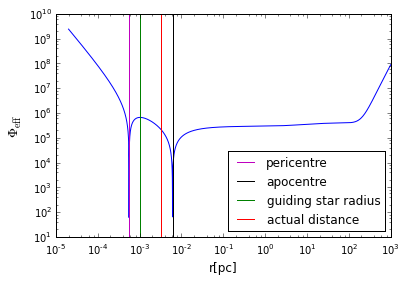

2 0.00336109 0.0048272755322748195
-4.12488164597e-24 0.251479047741


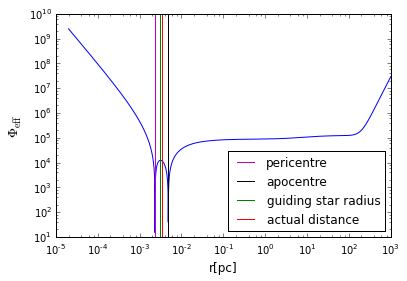

3 0.00435896 0.026489766114261987
-3.32435683555e-24 0.934660248313


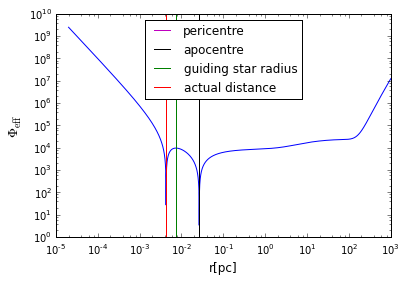

5 0.00484375 0.011909712407490626
-3.8800257951e-24 0.340252864506


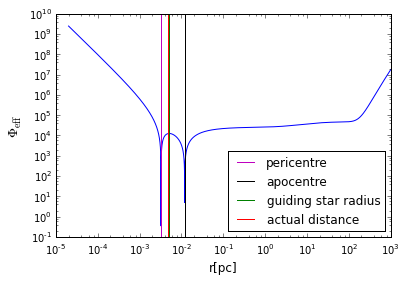

7 0.00572935 0.005799366299254562
-6.2668226869e-24 0.0118008881892


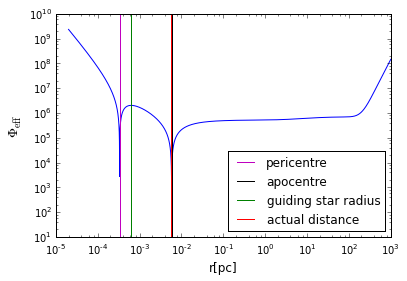

8 0.00599613 0.00762331685611002
-5.15854166979e-24 0.150318939656


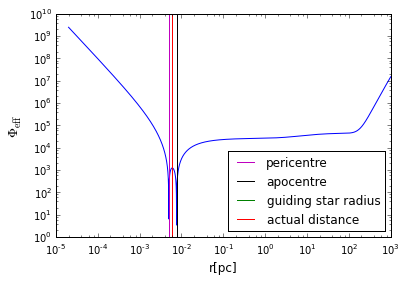

9 0.00602059 0.014952113673960207
-2.97968595618e-24 0.942332135129


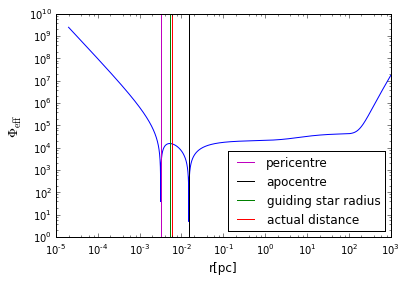

11 0.00756089 0.008318796098059973
-6.98136236708e-24 0.0780779664654


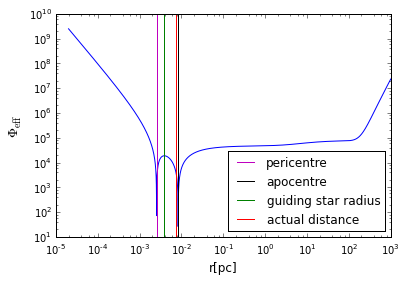

12 0.00773547 0.00813726264619548
-7.66569821575e-24 0.131541616537


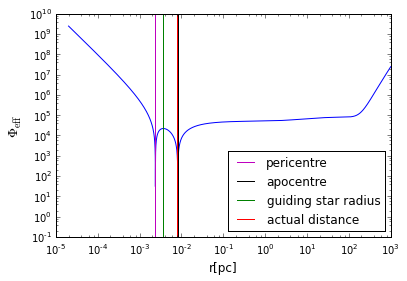

13 0.00774078 0.007767337428491283
-7.48922081046e-24 0.323707748149


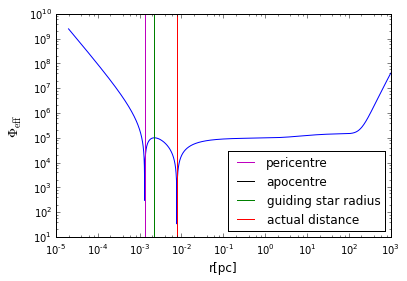

14 0.0079085 0.009219661051845737
-4.98337759471e-24 0.187874745677


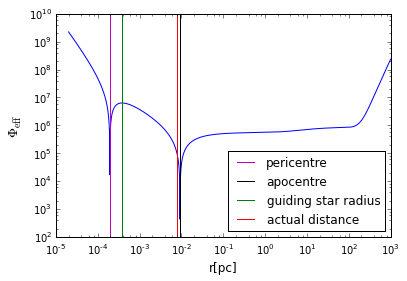

15 0.00837139 0.016592570908965834
-3.16917134737e-24 1.07048491002


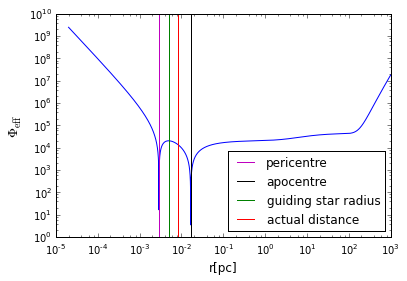

17 0.00928405 0.009596408775989397
-3.60707407895e-24 0.289519541857


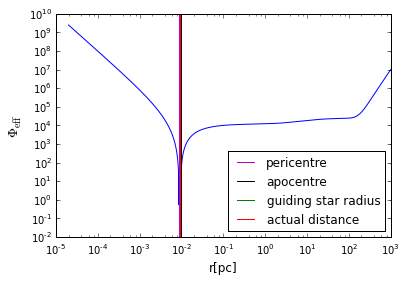

21 0.0112403 0.013088458957570055
-4.22285277374e-24 0.0275762757983


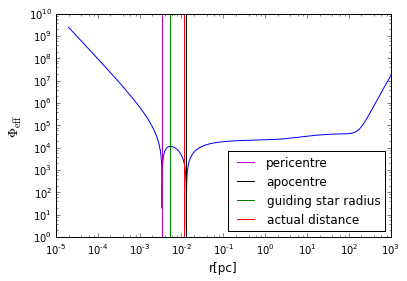

22 0.0115237 0.0182083862751427
-5.74866838801e-24 0.309834933248


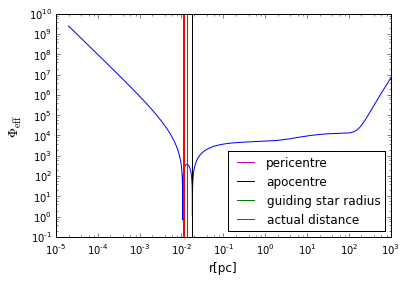

23 0.01179 0.013895628203501067
-4.17561485504e-24 0.187492810198


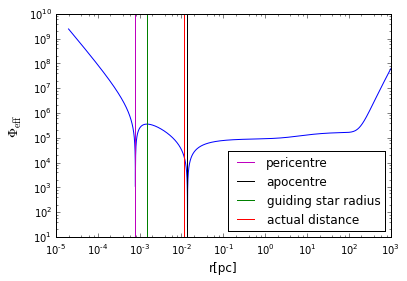

24 0.0126913 0.024426101111087666
-4.06064360335e-24 0.137381743839


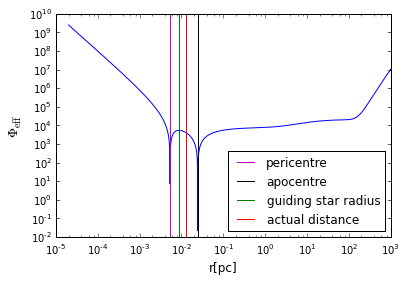

25 0.0127843 0.02491706608330523
-3.49497892499e-24 0.260042228886


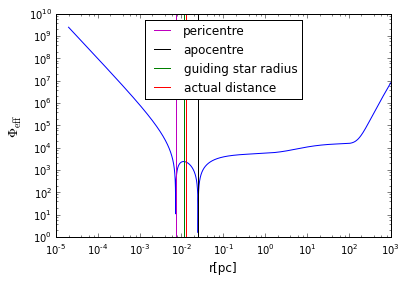

27 0.013803 0.019725891530638962
-3.1667130166e-24 0.765360222994


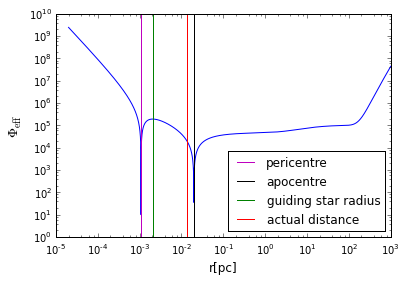

30 0.014474 0.020773643036293258
-3.45084056232e-24 0.570387481271


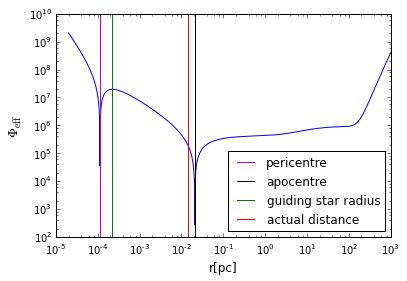

33 0.0154248 0.022048443557127453
-2.91242985815e-24 0.802066394503


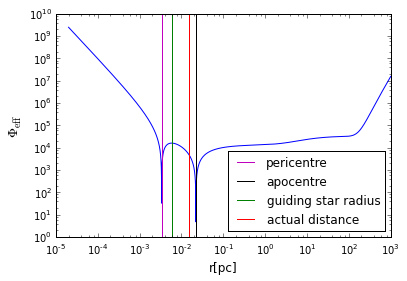

37 0.0163026 0.025545945583696782
-3.24908408449e-24 0.404956658465


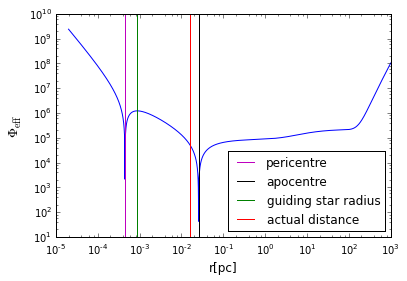

39 0.0165443 0.024960082818488247
-4.45932239764e-24 0.0391504501896


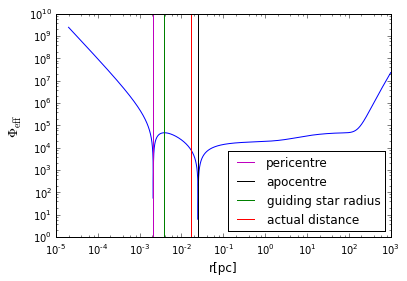

40 0.0165539 0.016583478695840443
-3.84407575637e-24 0.454923904922


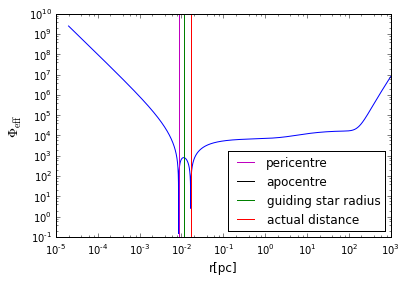

42 0.0168364 0.017948415010400794
-3.58247349841e-24 0.364230013056


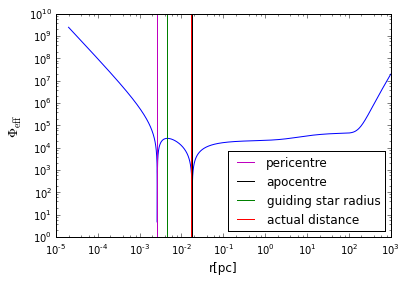

45 0.0174565 0.017518540165788538
-4.96640765949e-24 0.379288429229


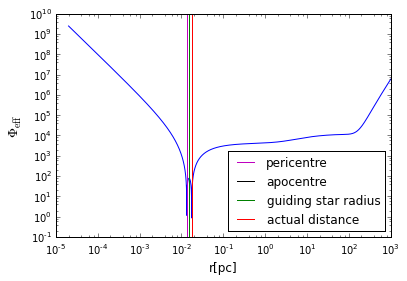

46 0.0175199 0.018725035598096178
-3.57764763499e-24 0.296683677742


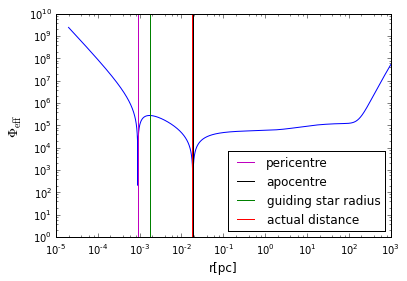

48 0.0177633 0.02117357694645169
-3.40312181747e-24 0.250982235022


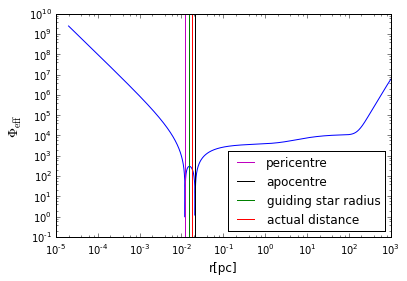

56 0.0192474 0.026928402534046974
-4.72759888673e-24 0.517797923998


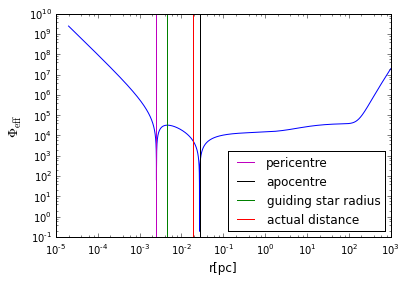

57 0.0192634 0.02153285543599845
-3.12522772797e-24 0.410738920351


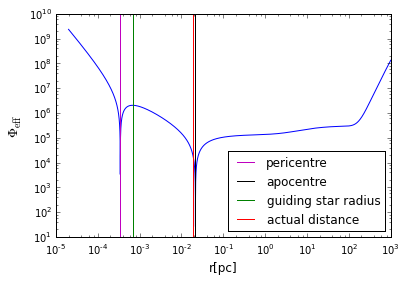

60 0.0200187 0.020456728934064604
-3.17147259011e-24 0.987041615163


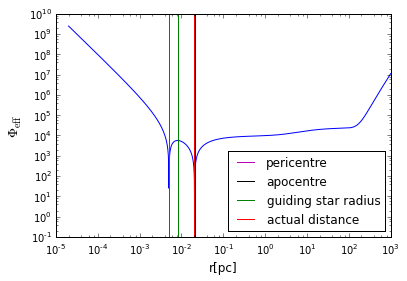

64 0.0204878 0.022948869079109105
-2.56119493553e-24 7.26003179692


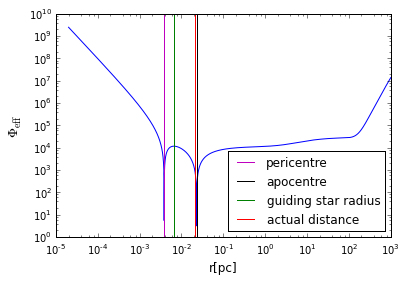

67 0.020793 0.021022041018240435
-3.72676190305e-24 0.56035804673


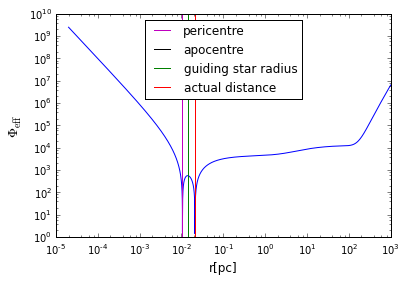

70 0.0216996 0.022956047645764203
-3.18622421465e-24 0.294379979153


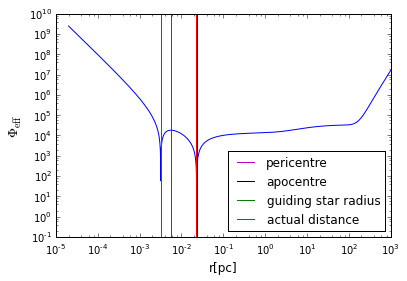

74 0.0227353 0.023065360930154967
-3.85874637934e-24 0.381591846099


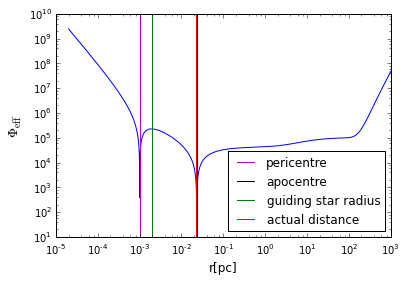

77 0.0234629 0.029517786468580012
-3.60656866544e-24 0.486269586561


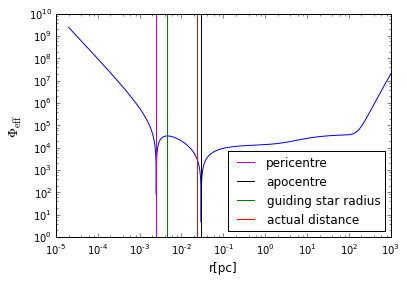

107 0.0292899 0.029334998553104414
-2.51537097253e-24 8.62265513609


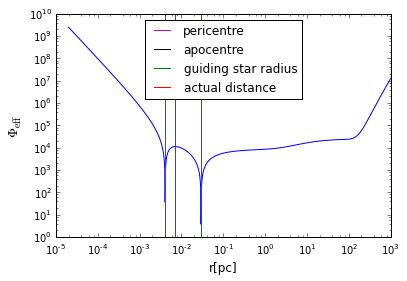

110 0.0301856 0.030907916103818277
-3.09806651986e-24 1.17601597451


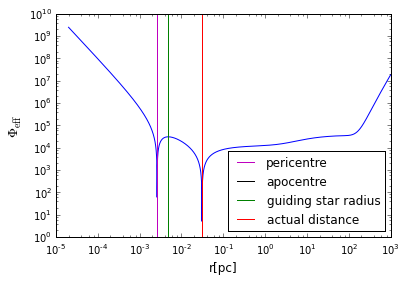

1026681 67.336 67.58078722418787
-2.3692349472e-25 417.027450325


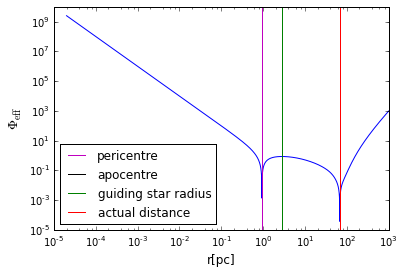

1026688 70.3929 70.46708394345035
-2.33073262775e-25 542.824877501


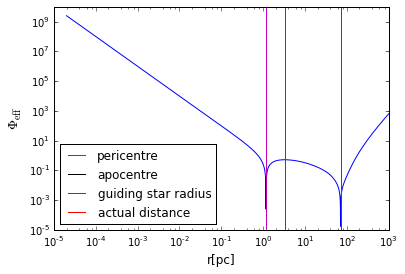

1026689 70.4976 70.52049680601036
-2.28933272539e-25 514.340983636


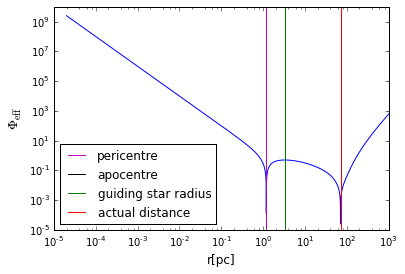

1026690 71.1775 71.42627584582885
-2.3005454672e-25 557.603457347


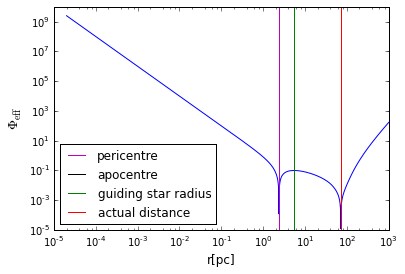

1026691 71.2207 71.65882280791584
-2.28624275425e-25 609.516571725


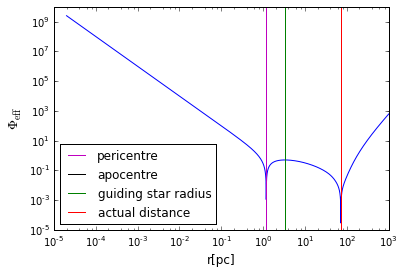

1026692 72.1396 72.42549968338338
-2.25607650167e-25 527.380113355


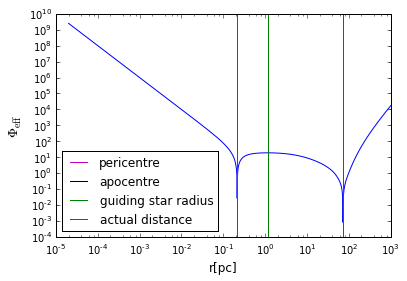

1026693 72.4223 72.47308698708355
-2.27185736013e-25 569.524503342


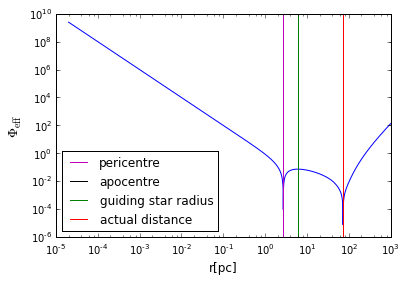

1026694 72.473 72.59632198760296
-2.25522726642e-25 608.653688632


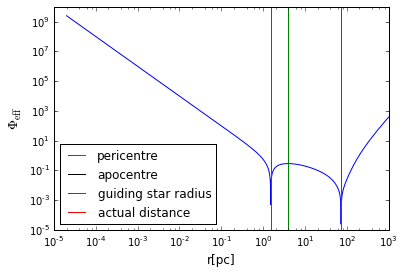

1026695 73.3169 73.44956447653375
-2.14649622148e-25 467.477356414


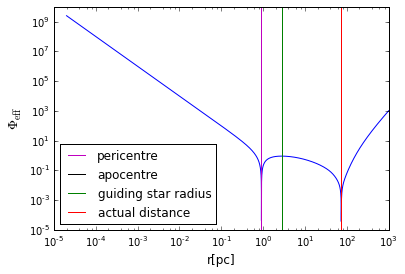

1026697 73.9835 75.5102078079214
-2.18712963051e-25 573.602664592


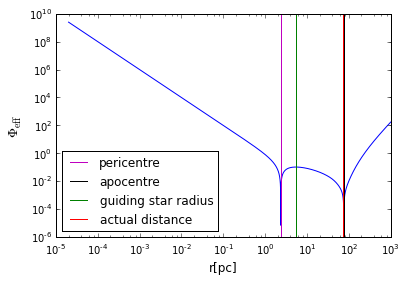

1026698 74.6668 75.00944953870116
-2.20118576121e-25 587.111001085


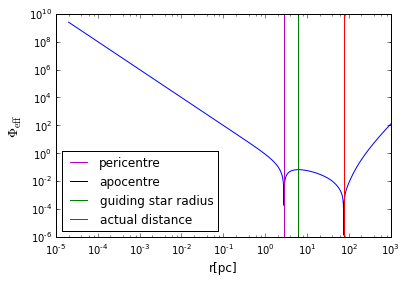

1026699 74.695 74.75428976897317
-2.17577838093e-25 627.139800047


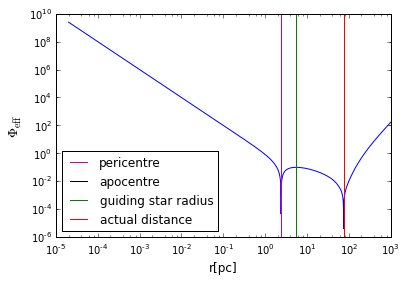

1026700 75.3255 76.0389810250435
-2.18233741317e-25 634.720386061


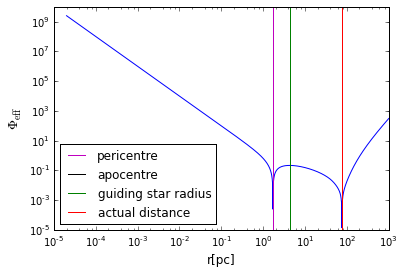

1026701 75.7425 75.79852515783926
-2.13622388178e-25 641.087411527


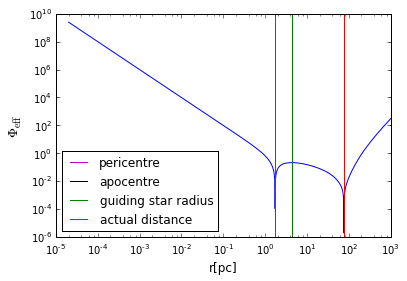

1026702 76.3835 77.2580392417504
-2.15815033055e-25 687.979041548


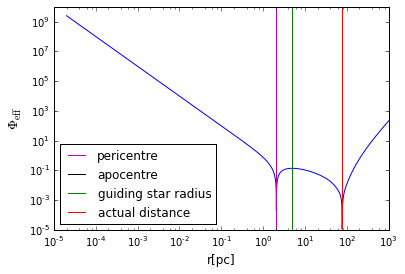

1026703 76.5405 76.96131697748147
-2.14987700066e-25 686.164650512


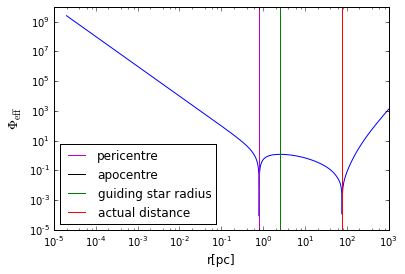

1026704 76.8494 77.17873988799911
-2.12172017184e-25 657.507143349


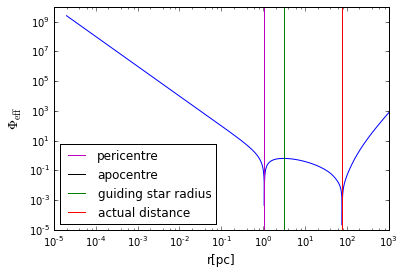

1026705 77.1303 77.72919918005263
-2.10566607956e-25 708.438663533


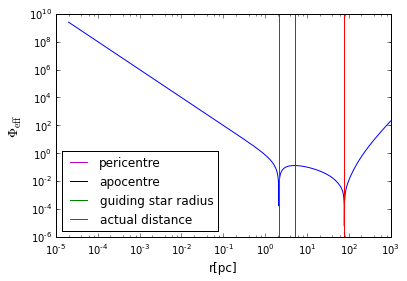

1026706 78.0875 78.56739081809725
-2.05233963378e-25 640.242564727


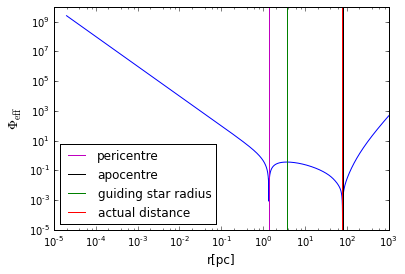

1026707 78.8689 78.89676781672141
-2.08345068667e-25 756.522827615


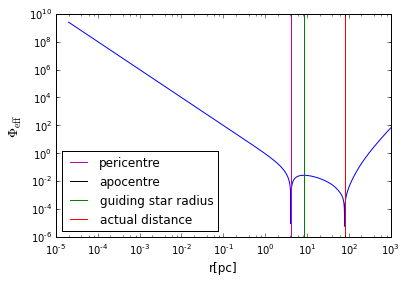

1026708 79.2368 79.41138272650855
-2.08226651949e-25 742.053638366


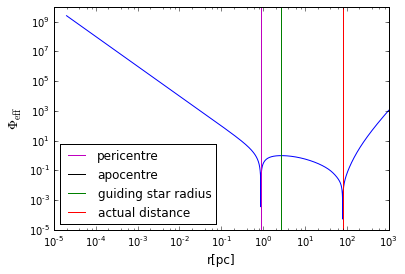

1026709 79.3188 79.33028963383695
-2.03812584723e-25 653.607613744


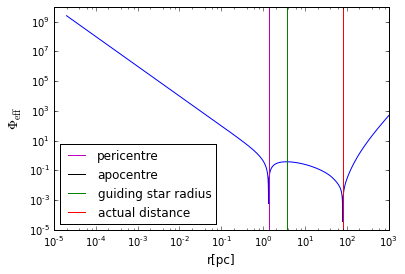

1026710 79.3441 79.36411311699997
-2.01530325909e-25 812.708842702


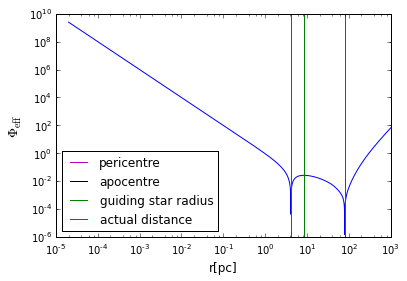

1026711 81.3986 81.43106859417313
-1.92244786341e-25 769.085719904


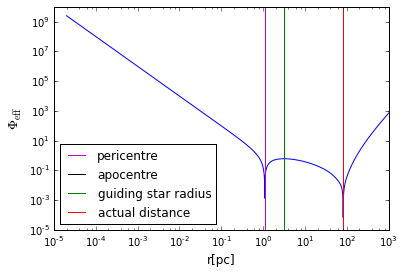

1026712 82.7145 83.04553012617643
-1.93806882974e-25 788.472974387


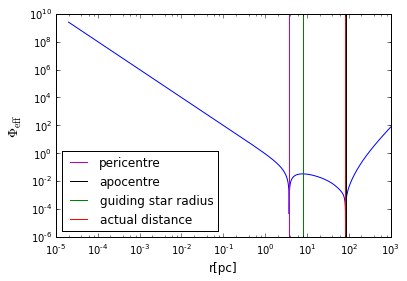

1026713 82.8576 82.85837421282444
-1.93690625057e-25 868.854590496


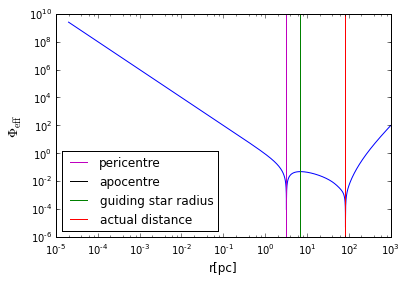

1026714 83.5006 83.52162744192745
-1.89499422088e-25 789.299153536


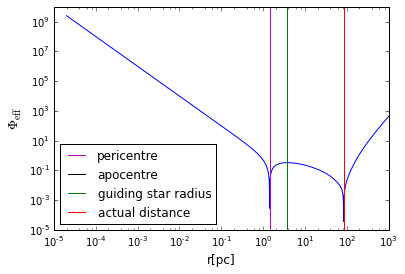

1026715 83.5447 83.67657391302667
-1.90968708855e-25 922.5467514


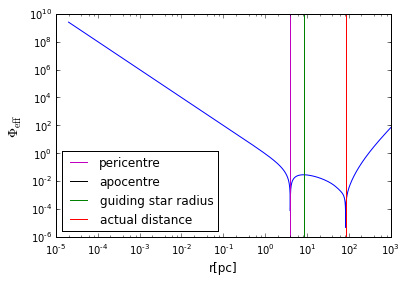

1026716 84.2043 84.36478644244004
-1.70938877383e-25 914.140774363


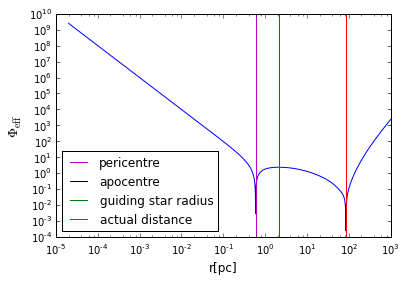

1026717 87.5481 87.79224685798631
-1.46414631699e-25 1238.92753374


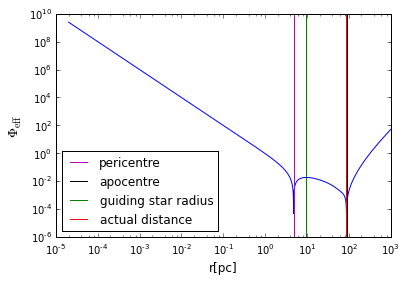

1026718 93.0654 93.06596872898541
-1.40355831528e-25 1192.61878853


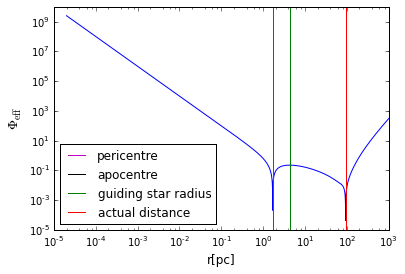

1026719 93.5725 93.59117491900459
-1.36769246635e-25 1349.93837771


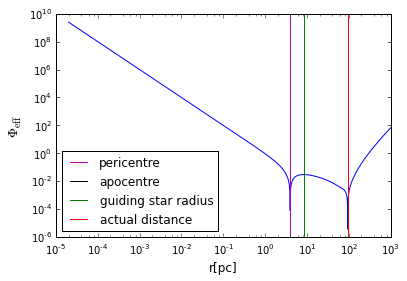

1026720 94.5448 94.63928480381145
-1.29178594443e-25 1375.74760941


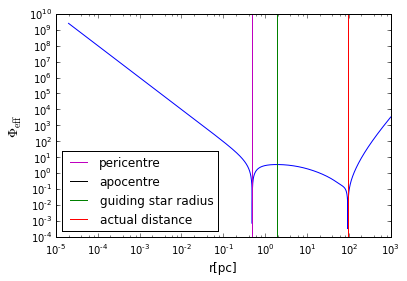

1026721 95.6556 95.66514535259697
-1.24513300541e-25 1279.47607886


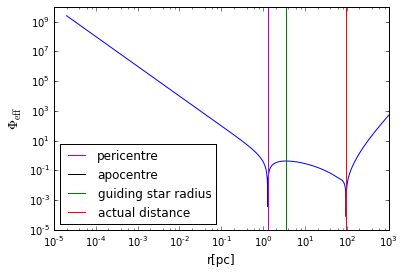

1026722 95.671 95.8040542615188
-1.27125999428e-25 1356.45890205


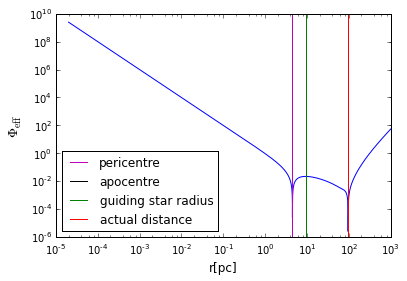

1026723 95.8426 95.85181115905809
-1.22608465305e-25 1273.79995764


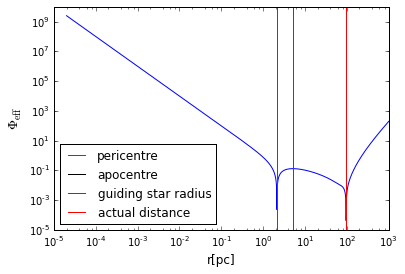

1026724 95.8809 95.94053751185751
-1.21405443951e-25 1370.4105943


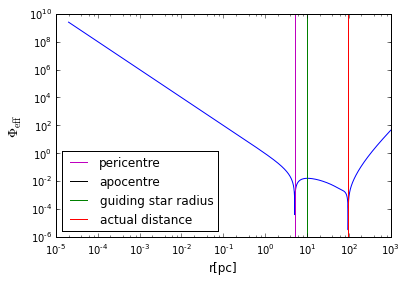

1026725 96.3671 96.56628929941313
-1.19001908759e-25 1463.76164244


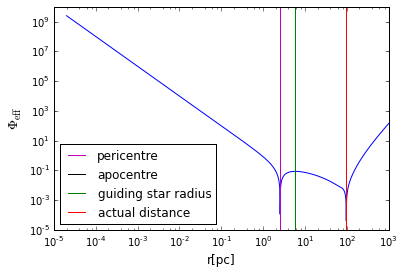

1026726 96.902 97.06872354852187
-1.163535927e-25 1377.76466501


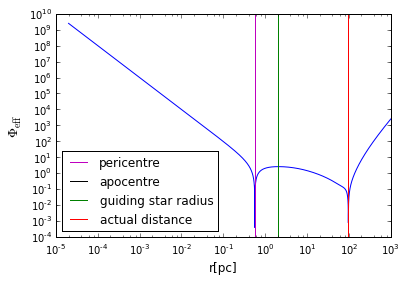

1026727 97.083 97.08370131673122
-9.03184511775e-26 1558.45581605


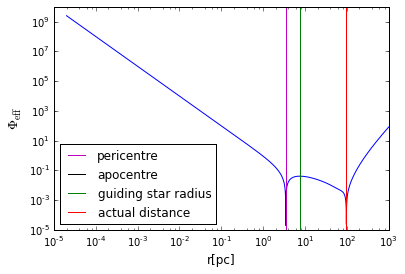

1026728 100.226 100.2506889728552
-6.60691625473e-26 1780.36978032


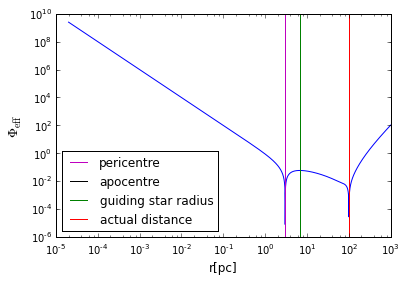

1026729 102.86 102.92671118370441
-5.15423154408e-26 1708.74879474


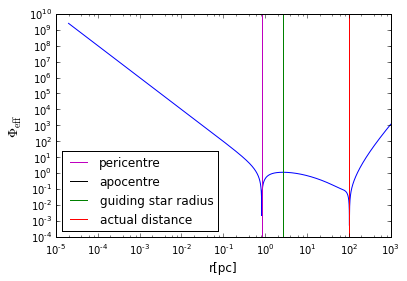

In [ ]:
#l=np.array((67,886,1565,7892,30986,79073,107836))
for k in range(len(l)):
    L=bh_orbit_1.angularmom(x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[0]
    E=bh_orbit_1.energy(x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    #print(bh_orbit_1._periapocenter_aux(1e-7,E,L),bh_orbit_1._periapocenter_aux(r_3d_1[l[k]],E,L),bh_orbit_1._periapocenter_aux(np.sqrt(x_1[l[k]]**2+y_1[l[k]]**2+z_1[l[k]]**2),E,L),bh_orbit_1._periapocenter_aux(np.max(bh_orbit_1._r_bin)*1.03,E,L))
    plt.loglog(r,np.abs(bh_orbit_1._periapocenter_aux(r=r,E=E,L=L)))
    plt.xlabel('r[pc]',fontsize=12)
    plt.ylabel('$\Phi_\mathrm{eff}$',fontsize=14)
    print(l[k],r_3d_1[l[k]],bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[1])
    print(E_1[l[k]],J_r_1[l[k]])
    plt.axvline(bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[0], color='m',label='pericentre')
    plt.axvline(bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[1], color='black',label='apocentre')
    plt.axvline(bh_orbit_1.r_guide(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]]),color='g',label='guiding star radius')
    plt.axvline(r_3d_1[l[k]],color='r',label='actual distance')    
    plt.legend(loc=0)
    plt.show()

l=np.array((67,886,1565,7892,30986,79073,107836))
for k in range(len(l)):
    L=bh_orbit_2.angularmom(x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])[0]
    E=bh_orbit_2.energy(x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    print(bh_orbit_2._periapocenter_aux(1e-7,E,L),bh_orbit_2._periapocenter_aux(r_3d_2[l[k]],E,L),bh_orbit_2._periapocenter_aux(np.sqrt(x_2[l[k]]**2+y_2[l[k]]**2+z_2[l[k]]**2),E,L),bh_orbit_2._periapocenter_aux(np.max(bh_orbit_2._r_bin)*1.03,E,L))
    plt.loglog(r,np.abs(bh_orbit_2._periapocenter_aux(r=r,E=E,L=L)))
    plt.xlabel('r[pc]',fontsize=12)
    plt.ylabel('$\Phi_\mathrm{eff}$',fontsize=14)
    print(r_3d_2[l[k]],np.sqrt(x_2[l[k]]**2+y_2[l[k]]**2+z_2[l[k]]**2))
    plt.axvline(r_3d_2[l[k]],color='r',label='actual distance')
    plt.axvline(bh_orbit_2.periapocenter(r_3d_2[l[k]],x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])[0], color='m',label='pericentre')
    plt.axvline(bh_orbit_2.periapocenter(r_3d_2[l[k]],x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])[1], color='black',label='apocentre')
    plt.axvline(bh_orbit_2.r_guide(r_3d_2[l[k]],x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]]),color='g',label='guiding star radius')
    plt.legend(loc=0)
    plt.show()

l=np.array((67,886,1565,7892,30986,79073,107836))
for k in range(len(l)):
    L=wobh_orbit_1.angularmom(x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])[0]
    E=wobh_orbit_1.energy(x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    print(wobh_orbit_1._periapocenter_aux(1e-7,E,L),wobh_orbit_1._periapocenter_aux(r_3d_wo_1[l[k]],E,L),wobh_orbit_1._periapocenter_aux(np.sqrt(x_wo_1[l[k]]**2+y_wo_1[l[k]]**2+z_wo_1[l[k]]**2),E,L),wobh_orbit_1._periapocenter_aux(np.max(wobh_orbit_1._r_bin)*1.03,E,L))
    plt.loglog(r,np.abs(wobh_orbit_1._periapocenter_aux(r=r,E=E,L=L)))
    plt.xlabel('r[pc]',fontsize=12)
    plt.ylabel('$\Phi_\mathrm{eff}$',fontsize=14)
    print(r_3d_wo_1[l[k]],np.sqrt(x_wo_1[l[k]]**2+y_wo_1[l[k]]**2+z_wo_1[l[k]]**2))
    plt.axvline(r_3d_wo_1[l[k]],color='r',label='actual distance')
    plt.axvline(wobh_orbit_1.periapocenter(r_3d_wo_1[l[k]],x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])[0], color='m',label='pericentre')
    plt.axvline(wobh_orbit_1.periapocenter(r_3d_wo_1[l[k]],x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])[1], color='black',label='apocentre')
    plt.axvline(wobh_orbit_1.r_guide(r_3d_wo_1[l[k]],x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]]),color='g',label='guiding star radius')
    plt.legend(loc=0)
    plt.show()

In [51]:
blob_sort_wo_2=(0.2<r_guide_wobh_2)*(r_guide_wobh_2<0.3) 
r3d_blobsort_wo_2=r3d_wo_2[blob_sort_wo_2]
J_r_blobsort_wo_2=J_r_wo_2[blob_sort_wo_2]#
test_x=np.flatnonzero(blob_sort_wo_2)


l=test
for k in range(len(test_x)):
    L=wobh_orbit_2.angularmom(x_wo_2[test_x[k]],y_wo_2[test_x[k]],z_wo_2[test_x[k]],vx_wo_2[test_x[k]],vy_wo_2[test_x[k]],vz_wo_2[test_x[k]])[0]
    E=wobh_orbit_2.energy(x_wo_2[test_x[k]],y_wo_2[test_x[k]],z_wo_2[test_x[k]],vx_wo_2[test_x[k]],vy_wo_2[test_x[k]],vz_wo_2[test_x[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    print(E,L,r)
    #print(wobh_orbit_2._periapocenter_aux(1e-7,E,L),wobh_orbit_2._periapocenter_aux(r_3d_wo_2[l[k]],E,L),wobh_orbit_2._periapocenter_aux(np.sqrt(x_wo_2[l[k]]**2+y_wo_2[l[k]]**2+z_wo_2[l[k]]**2),E,L),wobh_orbit_2._periapocenter_aux(np.max(wobh_orbit_2._r_bin)*1.03,E,L))
    plt.loglog(r,np.abs(wobh_orbit_2._periapocenter_aux(r=r,E=E,L=L)))
    plt.xlabel('r[pc]',fontsize=12)
    plt.ylabel('$\Phi_\mathrm{eff}$',fontsize=14)
    #print(r_3d_wo_2[l[k]],np.sqrt(x_wo_2[l[k]]**2+y_wo_2[l[k]]**2+z_wo_2[l[k]]**2))
    plt.axvline(r_3d_wo_2[test_x[k]],color='r',label='actual distance')
    plt.axvline(wobh_orbit_2.periapocenter(r_3d_wo_2[test_x[k]],x_wo_2[test_x[k]],y_wo_2[test_x[k]],z_wo_2[test_x[k]],vx_wo_2[test_x[k]],vy_wo_2[test_x[k]],vz_wo_2[test_x[k]])[0], color='m',label='pericentre')
    plt.axvline(wobh_orbit_2.periapocenter(r_3d_wo_2[test_x[k]],x_wo_2[test_x[k]],y_wo_2[l[k]],z_wo_2[l[k]],vx_wo_2[l[k]],vy_wo_2[l[k]],vz_wo_2[l[k]])[1], color='black',label='apocentre')
    plt.axvline(wobh_orbit_2.r_guide(r_3d_wo_2[l[k]],x_wo_2[l[k]],y_wo_2[l[k]],z_wo_2[l[k]],vx_wo_2[l[k]],vy_wo_2[l[k]],vz_wo_2[l[k]]),color='g',label='guiding star radius')
    plt.legend(loc=0)
    print(k)
    plt.show()

In [ ]:
len(np.abs(wobh_orbit_2._periapocenter_aux(r=r,E=E,L=L)))

In [42]:
len(r)

10000

In [43]:
len(np.abs(bh_orbit_1._periapocenter_aux(r=r,E=E,L=L)))

1

In [46]:
print(E,L)

-2.14580803169e-24 1.22474948649e-12
